
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.












  





In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
from sklearn.datasets import fetch_openml


<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

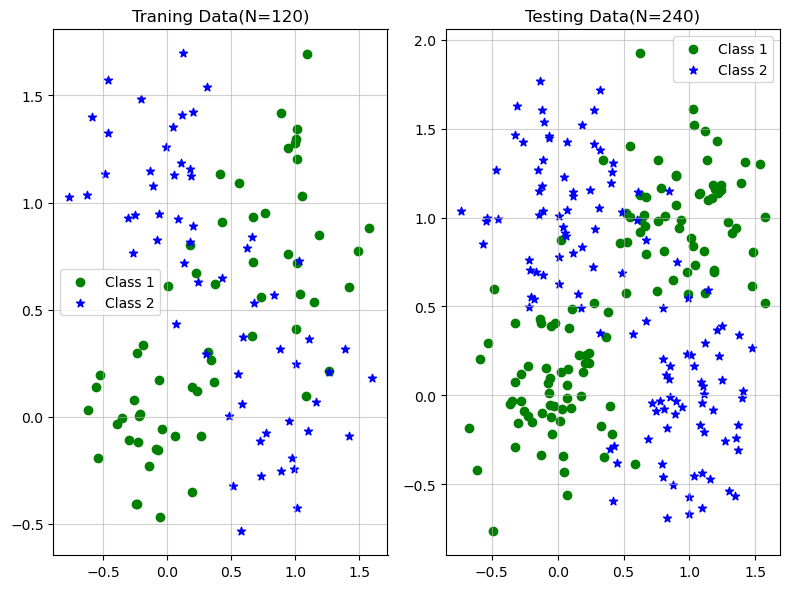

In [ ]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1= np.array([0,0])
mean2= np.array([0,1])
mean3= np.array([1,0])
mean4= np.array([1,1])
cov1= np.array([[0.1,0],[0,0.1]])
cov2= np.array([[0.1,0],[0,0.1]])
cov3= np.array([[0.1,0],[0,0.1]])
cov4= np.array([[0.1,0],[0,0.1]])


#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
X1= np.random.multivariate_normal(mean1,cov1,90)
X2= np.random.multivariate_normal(mean2,cov2,90)
X3= np.random.multivariate_normal(mean3,cov3,90)
X4= np.random.multivariate_normal(mean4,cov4,90)

#class1
class1_X_train = np.concatenate((X1[:30],X4[:30]),axis=0)
class1_y_train = np.array([1]*60)

#class2
class2_X_train = np.concatenate((X2[:30],X3[:30]),axis=0)
class2_y_train = np.array([-1]*60)

#Generate training data
X_train = np.concatenate((class1_X_train,class2_X_train),axis=0)
y_train = np.concatenate((class1_y_train,class2_y_train),axis=0)


#Generate testing data
#class1
class1_X_test = np.concatenate((X1[30:],X4[30:]),axis=0)
class1_y_test = np.array([1]*120)

#class2
class2_X_test = np.concatenate((X2[30:],X3[30:]),axis=0)
class2_y_test = np.array([-1]*120)

#Generate testing data
X_test = np.concatenate((class1_X_test,class2_X_test),axis=0)
y_test = np.concatenate((class1_y_test,class2_y_test),axis=0)

#Visualize the data using plt.scatter() function
color_code = {
    'Class 1': 'green',
    'Class 2': 'blue'
}

fig, axes = plt.subplots(1, 2, figsize=(8, 6)) #(11, 6) nice
axes[0].scatter(X_train[:60,0],X_train[:60,1],color='green', label ='Class 1')
axes[0].scatter(X_train[60:,0],X_train[60:,1], marker = '*', color='blue', label ='Class 2')
axes[0].set_title('Traning Data(N=120)')
axes[0].grid(axis='both', alpha = 0.6)
axes[0].legend()

axes[1].scatter(X_test[:120,0],X_test[:120,1],color='green', label = 'Class 1')
axes[1].scatter(X_test[120:,0],X_test[120:,1],marker='*',color='blue', label = 'Class 2')
axes[1].set_title('Testing Data(N=240)')
axes[1].grid(axis='both', alpha = 0.6)
axes[1].legend()
plt.tight_layout()
plt.show()


<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X\_train, y\_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X\_test):}$ This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

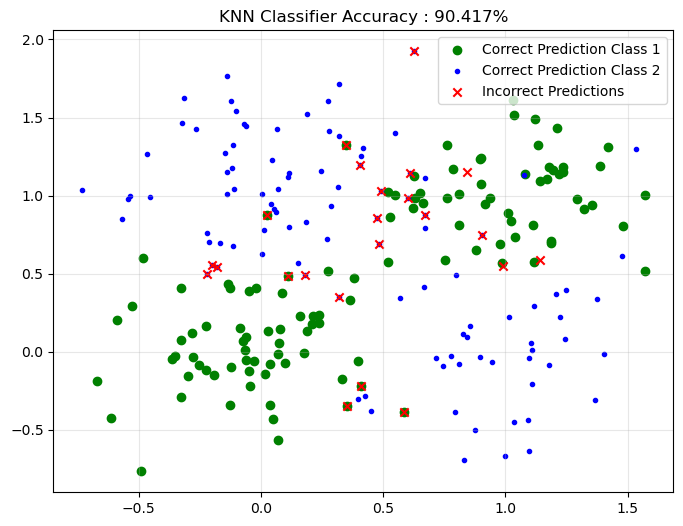

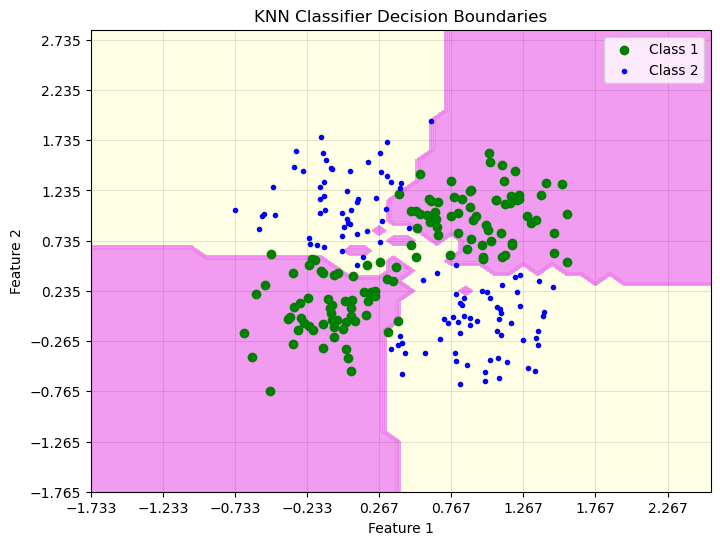

In [ ]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors,distance_metric):
        #Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 1.
        #Default distance_metric is L2 norm

        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train_fit,y_train_fit):
        #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and Y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)

        self.X_train = X_train_fit
        self.y_train = y_train_fit
        #print(len(self.X_train), len(self.y_train))

    def predict(self, X_test_pred):
        #This method predicts the class labels for a set of data samples. X_test is the data to be predicted, represented as a numpy array of shape (n_samples, n_features)
        #print(len(X_test_pred), len(self.X_train), len(self.y_train))
        predictions = []
        for test_point in X_test_pred:

            #use of list comprehension for getting the distances list
            distances = [self.distance(test_point, train_point) for train_point in self.X_train]
            k_nearest_indices = np.argsort(distances)[:self.n_neighbors]
            #print(k_nearest_indices)
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

            # Majority Voting
            prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(prediction)
        return np.array(predictions)

    def distance(self,x1,x2):
        if (self.distance_metric).casefold() == "l2" or (self.distance_metric).casefold() == "euclidean":
            return (np.linalg.norm(x1-x2))

        elif (self.distance_metric).casefold() == "l1" or (self.distance_metric).casefold() == "manhattan":
            return (np.sum(np.abs(x1-x2)))

        elif (self.distance_metric).casefold() == "linf" or (self.distance_metric).casefold() == "chebyshev":
            return (np.max(np.abs(x1-x2)))

        else:
            print("Invalid distance metric. Choose 'l2' or 'l1'.")
            #raise ValueError("Invalid distance metric. Choose 'l2' or 'l1'.")

            return float('inf')


#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
    #Inputs : Ground truth and predicted labels
    #Outputs : Portion of data points that are correctly classified, i.e., accuracy

    correct_pred = np.sum(true == pred)
    accuracy = correct_pred /len(true)
    return (100*accuracy)


#Create a visual representation of predictions
def prediction_plot(X_test, y_test, predictions):

    correct_indices = np.where(y_test == predictions)[0]
    incorrect_indices = np.where(y_test != predictions)[0]

    correct_indices_class1 = np.where(y_test[correct_indices] == 1)[0]
    correct_indices_class2 = np.where(y_test[correct_indices] == -1)[0]
    
    del correct_indices
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[correct_indices_class1, 0], X_test[correct_indices_class1, 1], marker = 'o',  color='green', label='Correct Prediction Class 1')
    plt.scatter(X_test[correct_indices_class2, 0], X_test[correct_indices_class2, 1], marker = '.',  color='blue', label='Correct Prediction Class 2')
    plt.scatter(X_test[incorrect_indices, 0], X_test[incorrect_indices, 1],marker = 'x', color='red', label='Incorrect Predictions')

    plt.title(f'KNN Classifier Accuracy : {KNNAccuracy(y_test, predictions):.3f}%' )
    """plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')"""
    plt.legend()
    plt.grid(axis='both', alpha = 0.3)
    plt.show()
    
    return



#Generate and visualize the decision regions and overlay the test points
def visualize_decision_boundaries(classifier, X_train, y_train, X_test, y_test):
    """
    Visualizes the decision boundaries of the KNN classifier.

    Args:
        classifier: The trained KNN classifier object.
        X_train: The training data.
        y_train: The true labels of the training data.
        X_test: The test data.
        y_test: The true labels of the test data.
    """

    correct_indices = np.where(y_test == predictions)[0]
    incorrect_indices = np.where(y_test != predictions)[0]

    correct_indices_class1 = np.where(y_test[correct_indices] == 1)[0]
    correct_indices_class2 = np.where(y_test[correct_indices] == -1)[0]
    del correct_indices

    # Creating a meshgrid for the decision boundaries
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the meshgrid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Ploting decision boundaries
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['lightyellow', 'violet' ]))

    # Overlapping the training and test data points
    #plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='green', marker='o', label='Class 1 (Train)')
    #plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1],  color='blue', marker='*', label='Class 2 (Train)')
    #plt.scatter(X_test[:, 0], X_test[:, 1], color='black', marker='.', label='Test Data')
    plt.scatter(X_test[predictions == 1, 0], X_test[predictions == 1, 1], marker = 'o',  color='green', label='Class 1')
    plt.scatter(X_test[predictions == -1, 0],X_test[predictions == -1, 1], marker = '.',  color='blue', label='Class 2')
    #plt.scatter(X_test[incorrect_indices, 0], X_test[incorrect_indices, 1],marker = 'x', color='red', label='Incorrect Predictions')

    plt.title('KNN Classifier Decision Boundaries')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xticks(np.arange(x_min, x_max, 0.5))
    plt.yticks(np.arange(y_min, y_max, 0.5))
    plt.grid(axis='both', alpha = 0.1, color='black')
    plt.legend()
    plt.show()
    
    return



#object created
classifier = KNeighborsClassifier(5, "l2")
classifier.fit(X_train, y_train)    #fitting the data
predictions = classifier.predict(X_test)    #predicting
#accuracy = KNNAccuracy(y_test, predictions)
prediction_plot(X_test, y_test, predictions)
visualize_decision_boundaries(classifier, X_train, y_train, X_test, y_test)#, correct_indices_class1, correct_indices_class2, incorrect_indices)


<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

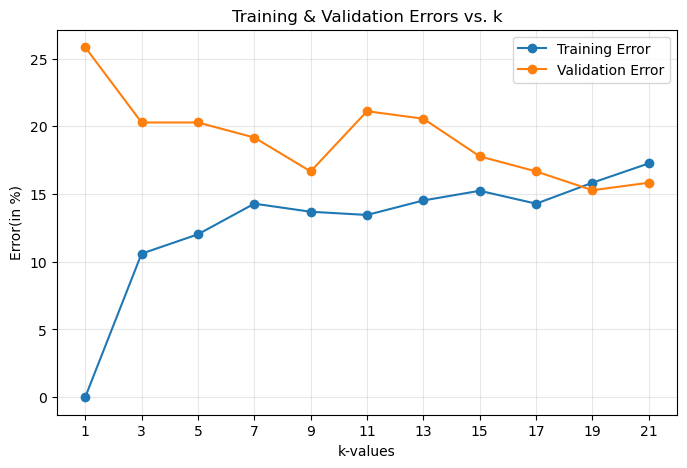

In [ ]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,rho, X_train_func, y_train_func, distance_metric):
  """
  Performs hold-out cross-validation for KNN.

  Args:
    k_range: A list of k values to evaluate.
    rho: The fraction of data to use for validation.

  Returns:
    A tuple containing the training and validation errors for each k.
  """
  #Iterate through range of k values
  #Hold out rho fraction of training data in each repetition.
  train_errors = []
  validation_errors = []

  """rho-fold cross validation begins"""

  for k in k_range:
    # Repeating the process 10 times
    temp_train_errors = []
    temp_validation_errors = []
    for _ in range(10):
      # Spliting data into training and validation sets
      num_validation = int(rho * len(X_train_func))
      validation_indices = np.random.choice(len(X_train_func), size=num_validation, replace=False) # indices to validate extracted
      train_indices = np.setdiff1d(np.arange(len(X_train_func)), validation_indices) #gives the set difference
      #print(validation_indices, train_indices)
      X_train_fold = X_train_func[train_indices]
      y_train_fold = y_train_func[train_indices]
      X_validation_fold = X_train_func[validation_indices]
      y_validation_fold = y_train_func[validation_indices]

      # Train and evaluate the KNN classifier
      #print(len(X_train_fold), len(y_train_fold))
      classifier = KNeighborsClassifier(k, distance_metric)
      classifier.fit(X_train_fold, y_train_fold)

      train_predictions = classifier.predict(X_train_fold)
      validation_predictions = classifier.predict(X_validation_fold)

      # Calculate errors
      temp_train_errors.append(100 - KNNAccuracy(y_train_fold, train_predictions))
      temp_validation_errors.append(100 - KNNAccuracy(y_validation_fold, validation_predictions))

    train_errors.append(np.mean(temp_train_errors))
    validation_errors.append(np.mean(temp_validation_errors))

  #Return errors on training and validation data
  return train_errors, validation_errors

def train_vs_validation_plot(k_range, train_errors, validation_errors):
  plt.figure(figsize=(8, 5))
  plt.plot(k_range, train_errors,marker="o", label='Training Error')
  plt.plot(k_range, validation_errors,marker="o", label='Validation Error')
  plt.title('Training & Validation Errors vs. k')
  plt.xlabel('k-values')
  plt.xticks(k_range)
  plt.ylabel('Error(in %)')
  plt.legend()
  plt.grid(axis='both', alpha = 0.3)
  plt.show()

#Plot training and validation errors for different values of k
k_range = range(1, 22, 2)  # Odd values from 1 to 21
rho = 0.3  # Fraction of data for validation
train_errors, validation_errors = holdoutCVkNN(k_range, rho, X_train, y_train, "l2")
train_vs_validation_plot(k_range, train_errors, validation_errors)


<b> Q/A </b>

5.  what is the best value for k?  
- The best value for k is the one that minimizes the validation error.
- From the plot, we can visually identify this value
6. Effect of rho on k?  
- Increasing rho (holding out more data for validation) generally leads to a more reliable estimate of the generalization error, but it also reduces the amount of data available for training.
- This can affect the choice of k .Experimenting with different rho values can help find a good tradeoff.

7. Evaluate the performance on test set with the best hyper parameters ( i.e best k ).  
- Once we've identified the best k using cross-validation, you can train a new KNN classifier with that k value using the entire training set.
- Then, evaluate its performance on the test set to get an unbiased estimate of how well it generalizes to unseen data.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets

In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases

def performance_with_varying_n(n_values, k_range, rho, repetitions=10):
    """Evaluates KNN performance for different training set sizes (n)."""
    results = {}

    for n in n_values:
        # Create a subset of the training data with size n
        subset_indices = np.random.choice(len(X_train), size=n, replace=True)
        X_train_subset = X_train[subset_indices]
        y_train_subset = y_train[subset_indices]
        #print(y_train_subset)
        # Perform hold-out cross-validation for the subset
        train_errors, validation_errors = holdoutCVkNN(k_range, rho, X_train_subset, y_train_subset, "l2")

        # Store the results
        results[n] = {
            'train_errors': train_errors,
            'validation_errors': validation_errors,
        }

    return results

# Example usage:
n_values = [200, 400, 1200]  # Training set sizes to evaluate
#suggested to run each of n_values individually for answer, overall run time takes long( 5- 7 mins)
k_range = range(1, 22, 2)  # Range of k values
rho = 0.3  # Hold-out fraction
results = performance_with_varying_n(n_values, k_range, rho)

#
for n, data in results.items():
    print(f"Result for n = {n}:")
    print(f"  Training Errors: {data['train_errors']}")
    print(f"  Validation Errors: {data['validation_errors']}")
    train_vs_validation_plot(k_range, data['train_errors'], data['validation_errors'])


#Performance evaluation with different data distributions, i.e., Gaussian, Laplacian
def create_multivariate_laplacian(mean, cov, size):
    """Generates multivariate Laplacian data using NumPy."""
    dim = len(mean) # dimentionality
    standard_laplacian = np.random.laplace(loc=0, scale=1, size=(size, dim)) #standard laplacian random variables
    # Cholesky decomposition for correlation
    L = np.linalg.cholesky(cov)
    # Scale and shift to get the desired distribution
    laplacian_data = mean + standard_laplacian @ L
    return laplacian_data

#  Generate Training and Testing Data (Laplacian)
X1_lap = create_multivariate_laplacian(mean1, cov1, 90)
X2_lap = create_multivariate_laplacian(mean2, cov2, 90)
X3_lap = create_multivariate_laplacian(mean3, cov3, 90)
X4_lap = create_multivariate_laplacian(mean4, cov4, 90)

class1_X_train_lap = np.concatenate((X1_lap[:30], X4_lap[:30]), axis=0)
class1_X_test_lap = np.concatenate((X1_lap[30:], X4_lap[30:]), axis=0)
class2_X_train_lap = np.concatenate((X2_lap[:30], X3_lap[:30]), axis=0)
class2_X_test_lap = np.concatenate((X2_lap[30:], X3_lap[30:]), axis=0)

X_train_lap = np.concatenate((class1_X_train_lap, class2_X_train_lap), axis=0)
X_test_lap = np.concatenate((class1_X_test_lap, class2_X_test_lap), axis=0)
y_train_lap = np.concatenate((np.ones(60), -np.ones(60)))
y_test_lap = np.concatenate((np.ones(120), -np.ones(120)))

# Evaluate KNN Performance (Gaussian and Laplacian)
knn_l1 = KNeighborsClassifier(5, 'l1')
knn_l2 = KNeighborsClassifier(5, 'l2')

#     Gaussian Data
knn_l1.fit(X_train, y_train)
knn_l2.fit(X_train, y_train)
predictions_l1_gaussian = knn_l1.predict(X_test)
predictions_l2_gaussian = knn_l2.predict(X_test)

accuracy_l1_gaussian = KNNAccuracy(y_test, predictions_l1_gaussian)
accuracy_l2_gaussian = KNNAccuracy(y_test, predictions_l2_gaussian)

#     Laplacian Data
knn_l1.fit(X_train_lap, y_train_lap)
knn_l2.fit(X_train_lap, y_train_lap)
predictions_l1_laplacian = knn_l1.predict(X_test_lap)
predictions_l2_laplacian = knn_l2.predict(X_test_lap)

accuracy_l1_laplacian = KNNAccuracy(y_test_lap, predictions_l1_laplacian)
accuracy_l2_laplacian = KNNAccuracy(y_test_lap, predictions_l2_laplacian)

#   Results
print("\nGaussian Data:")
print(f"  L1 Accuracy: {accuracy_l1_gaussian:.2f}%")
print(f"  L2 Accuracy: {accuracy_l2_gaussian:.2f}%")
print("\nLaplacian Data:")
print(f"  L1 Accuracy: {accuracy_l1_laplacian:.2f}%")
print(f"  L2 Accuracy: {accuracy_l2_laplacian:.2f}%")


KeyboardInterrupt: 

**Choosing k in KNN as n changes**  
- *Small k (e.g., 3, 5, 7)* → High variance, risk of overfitting.  
- *Large k (e.g., √n or log(n))* → High bias, risk of underfitting.  
- Start with `k ≈ √n` (a rule of thumb)or `k ≈ log(n)`, increasing `k` as `n` grows.  
- *For small n* → Small `k` is needed to capture local patterns. *For large n* → Larger `k` improves stability and reduces variance.  
- Small `k` = sensitive decision boundaries, Large `k` = smoother but biased.

**Summary of Stability of the Solution**  
- *Small n → High Variance:* Small `k` (e.g., 3 or 5) leads to unstable decision boundaries, sensitive to noise.  
- *Large n → Improved Stability:* Increasing `k` (e.g., √n or log(n)) makes predictions more stable and smooth.  
- *Bias-Variance Tradeoff:* Small `k` risks *overfitting*, large `k` risks *underfitting*—optimal `k` balances both.  
- In high-dimensional spaces, distances lose meaning, so `k` selection needs extra care.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.

L1 Accuracy: 90.417%
L2 Accuracy: 90.417%
L-inf Accuracy: 90.000%


L1 metirc



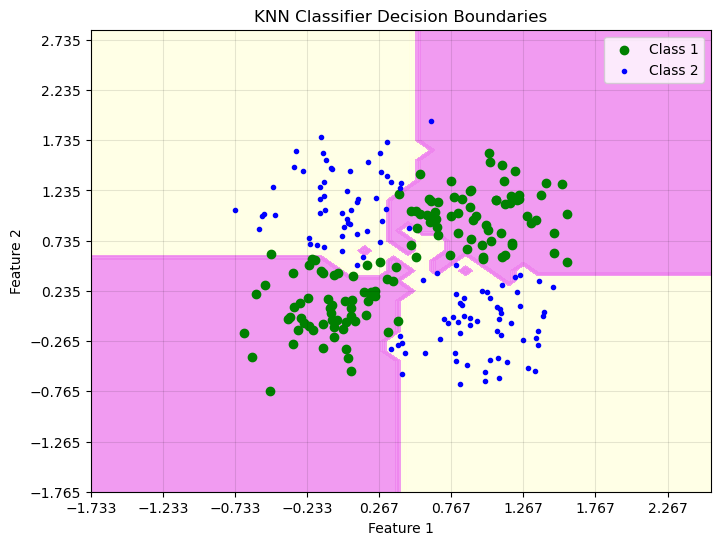





L2 metirc



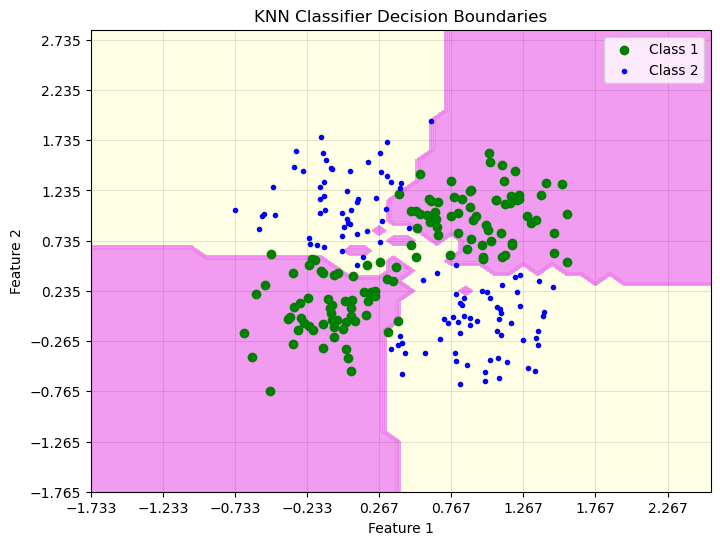





L-inf metirc



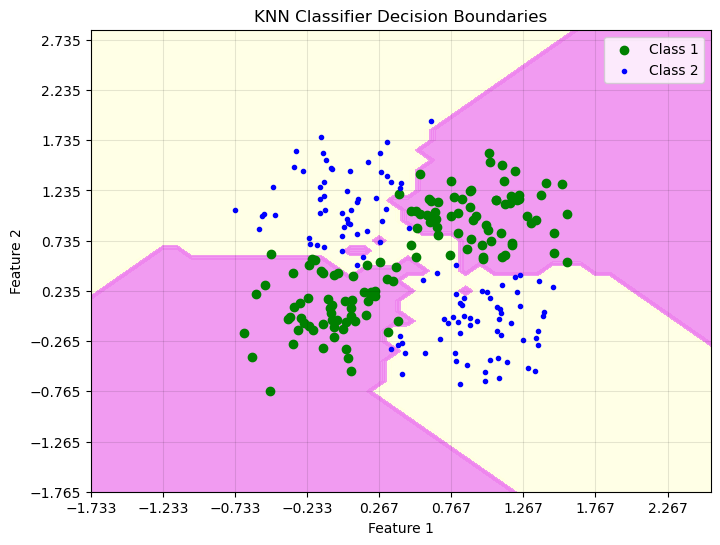

In [ ]:
##################################
#Part(e): Influence of distance metric on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance metric
l1_metirc_object = KNeighborsClassifier(5, "l1")
l1_metirc_object.fit(X_train, y_train)
l1_predictions = l1_metirc_object.predict(X_test)
print(f"L1 Accuracy: {KNNAccuracy(y_test, l1_predictions):.3f}%")

l2_metirc_object = KNeighborsClassifier(5, "l2")
l2_metirc_object.fit(X_train, y_train)
l2_predictions = l2_metirc_object.predict(X_test)
print(f"L2 Accuracy: {KNNAccuracy(y_test, l2_predictions):.3f}%")

linf_metirc_object = KNeighborsClassifier(5, "linf")
linf_metirc_object.fit(X_train, y_train)
l_inf_predictions = linf_metirc_object.predict(X_test)
print(f"L-inf Accuracy: {KNNAccuracy(y_test, l_inf_predictions):.3f}%\n")


#Understand the decision regions of KNN classifier with different distance metric
print("L1 metirc", end="\n\n")
visualize_decision_boundaries(l1_metirc_object, X_train, y_train, X_test, y_test)
print("\n\n\n")
print("L2 metirc", end="\n\n")
visualize_decision_boundaries(l2_metirc_object, X_train, y_train, X_test, y_test)
print("\n\n\n")
print("L-inf metirc", end="\n\n")
visualize_decision_boundaries(linf_metirc_object, X_train, y_train, X_test, y_test)



**L1 (Manhattan) Distance**

- The decision boundaries exhibit a blocky, stair-step pattern.
- since L1 distance measures the absolute differences in feature values, meaning the nearest neighbors are determined based on city-block distances rather than direct diagonal distances.
- Decision regions tend to be **elongated along the axes** rather than forming smooth curves.

**L2 (Euclidean) Distance**

- The decision regions are expected to be smooth and curved.
- Since L2 distance measures the shortest straight-line distance between points, naturally forming **rounded** decision boundaries.

**L∞ (Chebyshev) Distance**

- The decision regions form diamond-like with sharp edges.L∞ distance considers the **maximum absolute difference** between coordinates, meaning the classifier selects neighbors within square neighborhoods instead of circles.
- The decision regions are expected to be more compact compared to L1 and L2.Classification is influenced primarily by the largest coordinate difference, making it effective in grid-based movement applications.The decision regions resemble squares oriented at 45 degrees, giving the boundary a distinct, segmented look.


<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.

k=1| metric=l1 | accuracy=85.800 %
k=1| metric=l2 | accuracy=87.700 %
k=2| metric=l1 | accuracy=82.700 %
k=2| metric=l2 | accuracy=85.100 %
k=3| metric=l1 | accuracy=84.600 %
k=3| metric=l2 | accuracy=86.500 %
k=4| metric=l1 | accuracy=84.200 %
k=4| metric=l2 | accuracy=86.200 %
k=5| metric=l1 | accuracy=84.200 %
k=5| metric=l2 | accuracy=85.400 %
k=6| metric=l1 | accuracy=83.400 %
k=6| metric=l2 | accuracy=85.500 %
k=7| metric=l1 | accuracy=83.100 %
k=7| metric=l2 | accuracy=85.600 %


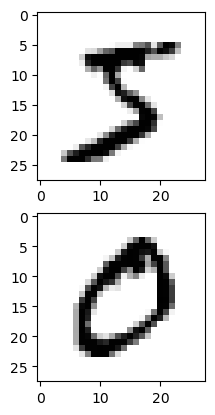

In [ ]:
##################################
#Part(f): MNIST Digit classification using KNN classifier
##################################

#Load MNIST data
"""
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml"""
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits
def train_validate_test_split(X, y, train_ratio, val_ratio, seed):
    np.random.seed(seed)
    indices = np.random.permutation(len(X))

    training_size = int(len(X) * train_ratio)
    validation_size = int(len(X) * val_ratio)

    training_indices = indices[:training_size]
    validation_indices = indices[training_size:training_size+validation_size]
    test_indices = indices[training_size+validation_size:]

    X_train = X[training_indices]
    y_train = y[training_indices]
    X_validate = X[validation_indices]
    y_validate = y[validation_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

    return X_train, X_validate, X_test, y_train, y_validate, y_test

# Split the MNIST data
X_train, X_validate, X_test, y_train, y_validate, y_test = train_validate_test_split(images, targets, 0.8, 0.1, 42)

#Write 'MultiClassKNNClassify' function
class MultiClassKNNClassifier:
    def __init__(self, n_neighbors, distance_metric):
        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train_fit, y_train_fit):
        self.X_train = X_train_fit
        self.y_train = y_train_fit

    def compute_distances(self, x, metric):
        distances = []
        for y in self.X_train:
            if metric.casefold() == "l2" or metric.casefold() == "euclidean":
                distances.append(np.sqrt(np.sum((x - y) ** 2)))
            elif metric.casefold() == "l1" or metric.casefold() == "manhattan":
                distances.append(np.sum(np.abs(x - y)))
            elif (self.distance_metric).casefold() == "linf" or (self.distance_metric).casefold() == "chebyshev":
                distances.append(np.max(np.abs(x-y)))
        return np.array(distances)

    def predict_one(self, x):
        distances = self.compute_distances(x, self.distance_metric)
        nearest_indices = np.argsort(distances)[:self.n_neighbors]
        nearest_labels = self.y_train[nearest_indices]
        # Find most common label
        unique_labels, counts = np.unique(nearest_labels, return_counts=True)
        return unique_labels[np.argmax(counts)]

    def predict(self, X_test_pred):
        predictions = []
        for x in X_test_pred:
            pred = self.predict_one(x)
            predictions.append(pred)
        return np.array(predictions)

#Create a confusion matrix for test data


# Use a small subset for faster testing
subset_size = 1000 #taking a sample of the total data for approximation
X_train_small = X_train[:subset_size]
y_train_small = y_train[:subset_size]
X_validate_small = X_validate[:subset_size]
y_validate_small = y_validate[:subset_size]

#Empirically chose most suitable k and distance metric based on the evauation on cross-validation data
k_values = [1, 3, 5, 7]
k_range = range(1, 21, 1)
distance_metrics = ["l1", "l2", "linf"]
best_accuracy = 0
best_k = None
best_metric = None

for k in k_range:
    for metric in distance_metrics:
        classifier = MultiClassKNNClassifier(k, metric)
        classifier.fit(X_train_small, y_train_small)
        predictions = classifier.predict(X_validate_small)
        accuracy = (np.mean(predictions == y_validate_small)) * 100
        print(f"k={k}| metric={metric} | accuracy={accuracy:.3f} %")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_metric = metric


def compute_confusion_matrix(true, pred):
    #Inputs: Ground truth labels and classifier predictions
    #Outputs: Confusion matrix
    #Confusion matrix: A confusion matrix is a table that summarizes the performance of a classification model by comparing its predictions to the actual ground truth values
    #Rows: Represent the actual class labels
    #Columns: Represent the predicted class labels
    labels = np.unique(true)
    n_classes = len(labels)
    matrix = np.zeros((n_classes, n_classes))

    label_to_index = {label: i for i, label in enumerate(labels)}

    for t, p in zip(true, pred):
        matrix[label_to_index[t]][label_to_index[p]] += 1

    return matrix, labels



#Suggest an alternative ways to improve performance



<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data



Best parameters: k=1, metric=l2, validation accuracy=87.700 %
Test accuracy with best parameters: 89.200 %


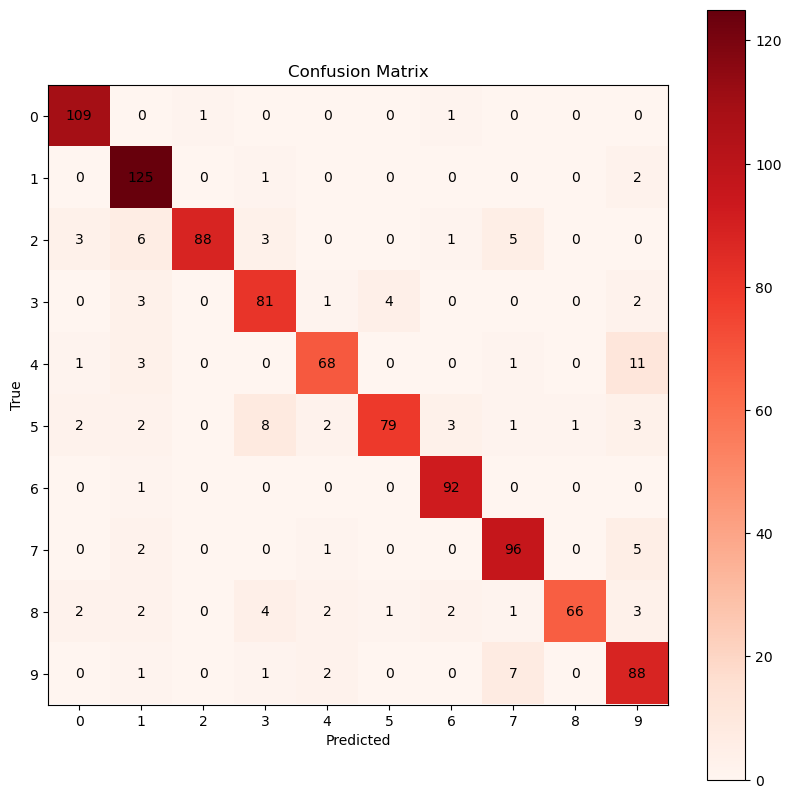

In [ ]:
print(f"\nBest parameters: k={best_k}, metric={best_metric}, validation accuracy={best_accuracy:.3f} %")

#Evaluate the performance on test data with the best hyper parameters ( k, distance metric ) obtained from cross validationTest with best parameters
best_knn = MultiClassKNNClassifier(best_k, best_metric)
best_knn.fit(X_train_small, y_train_small)
test_predictions = best_knn.predict(X_test[:subset_size])
test_accuracy = (np.mean(test_predictions == y_test[:subset_size])) * 100
print(f"Test accuracy with best parameters: {test_accuracy:.3f} %")

# Create and plot confusion matrix
matrix, labels = compute_confusion_matrix(y_test[:subset_size], test_predictions)

plt.figure(figsize=(10,10))
plt.imshow(matrix, cmap='Reds')
plt.colorbar()
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, int(matrix[i, j]), ha='center', va='center')

plt.show()


#### Observations from Confusion matrix
1. *High accuracy* for digits $0, 1, 6,$ and $7$.  
2. *Confusion* arises mainly between $4$ and $9, 2$ and $3, 8$ and $5$.   

#### Improvements:
- Feature scaling, better distance metrics, data augmentation.  

